### Import Required Libraries

In [2]:
import numpy as np
from matplotlib import pyplot
from ClustReduce import *


### Assignment-specific functions

In [3]:
# -------------------------------------------------------------------------------------------------
#               Class - to group together assignment-specific functions
# -------------------------------------------------------------------------------------------------
class assignment ():
    def __init__ (self, alpha_init, test_sigmas_init, max_epochs, checkpoints_epoch):
        self.alpha_init = alpha_init
        self.test_sigmas_init = test_sigmas_init
        self.no_max_epochs = max_epochs
        self.checkpoints_epoch = checkpoints_epoch

        self.training_data = None

    
    def generate_input_data (self):
       # Input to the Network
        self.training_data = np.array([[255,0,0], [139,0,0], [128,0,0], [255,69,0], # Red
                [0,0,255], [135,206,250], [70,130,180], [75,0,130],                 # Blue
                [0,128,0], [0,100,0], [32,178,170], [0,250,154],                    # Green
                [255,255,0], [128,128,0], [240,230,140], [218,165,32],              # Yellow
                [0,128,128], [0,139,139], [0,255,255], [224,255,255],               # Teal
                [255,192,203], [255,20,147], [199,21,133], [128,0,128]]) / 255      # Pink


    def train_and_observe (self):
        config, plot = pyplot.subplots(len(self.test_sigmas_init), len(self.checkpoints_epoch) + 1)
        config.set_size_inches(len(self.test_sigmas_init) * 5, (len(self.checkpoints_epoch) + 1) * 5)

        x = 0
        # Train the network with different values of initial sigma
        for sig in self.test_sigmas_init:            
            ksom_1 = KSOM(size_input_features = 3, rows = 100, columns = 100, alpha_init = self.alpha_init, neighbourhood = True, max_epochs = self.no_max_epochs, sigma = sig)
            results = ksom_1.train(np.array(self.training_data), checkpoints = self.checkpoints_epoch)
            
            # Draw the plots
            # pyplot.text(120, 0, "Plots for Sigma = " + str(sig), fontsize=15)
            for i in range(len(results)):
                if i == 0:
                    plot[x, i].set_title("At epoch: 1\n Spread: " + str(sig))
                else:
                    plot[x, i].set_title("At epoch: " + str(self.checkpoints_epoch[i - 1]) + "\n Spread: " + str(sig))
                plot[x, i].axis("off")
                plot[x, i].imshow(results[i].T.reshape(100, 100, 3))

            x += 1

        pyplot.show()
# -------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------


# Train the Network - with RGB inputs
## + and draw the resulting plots at specified epochs

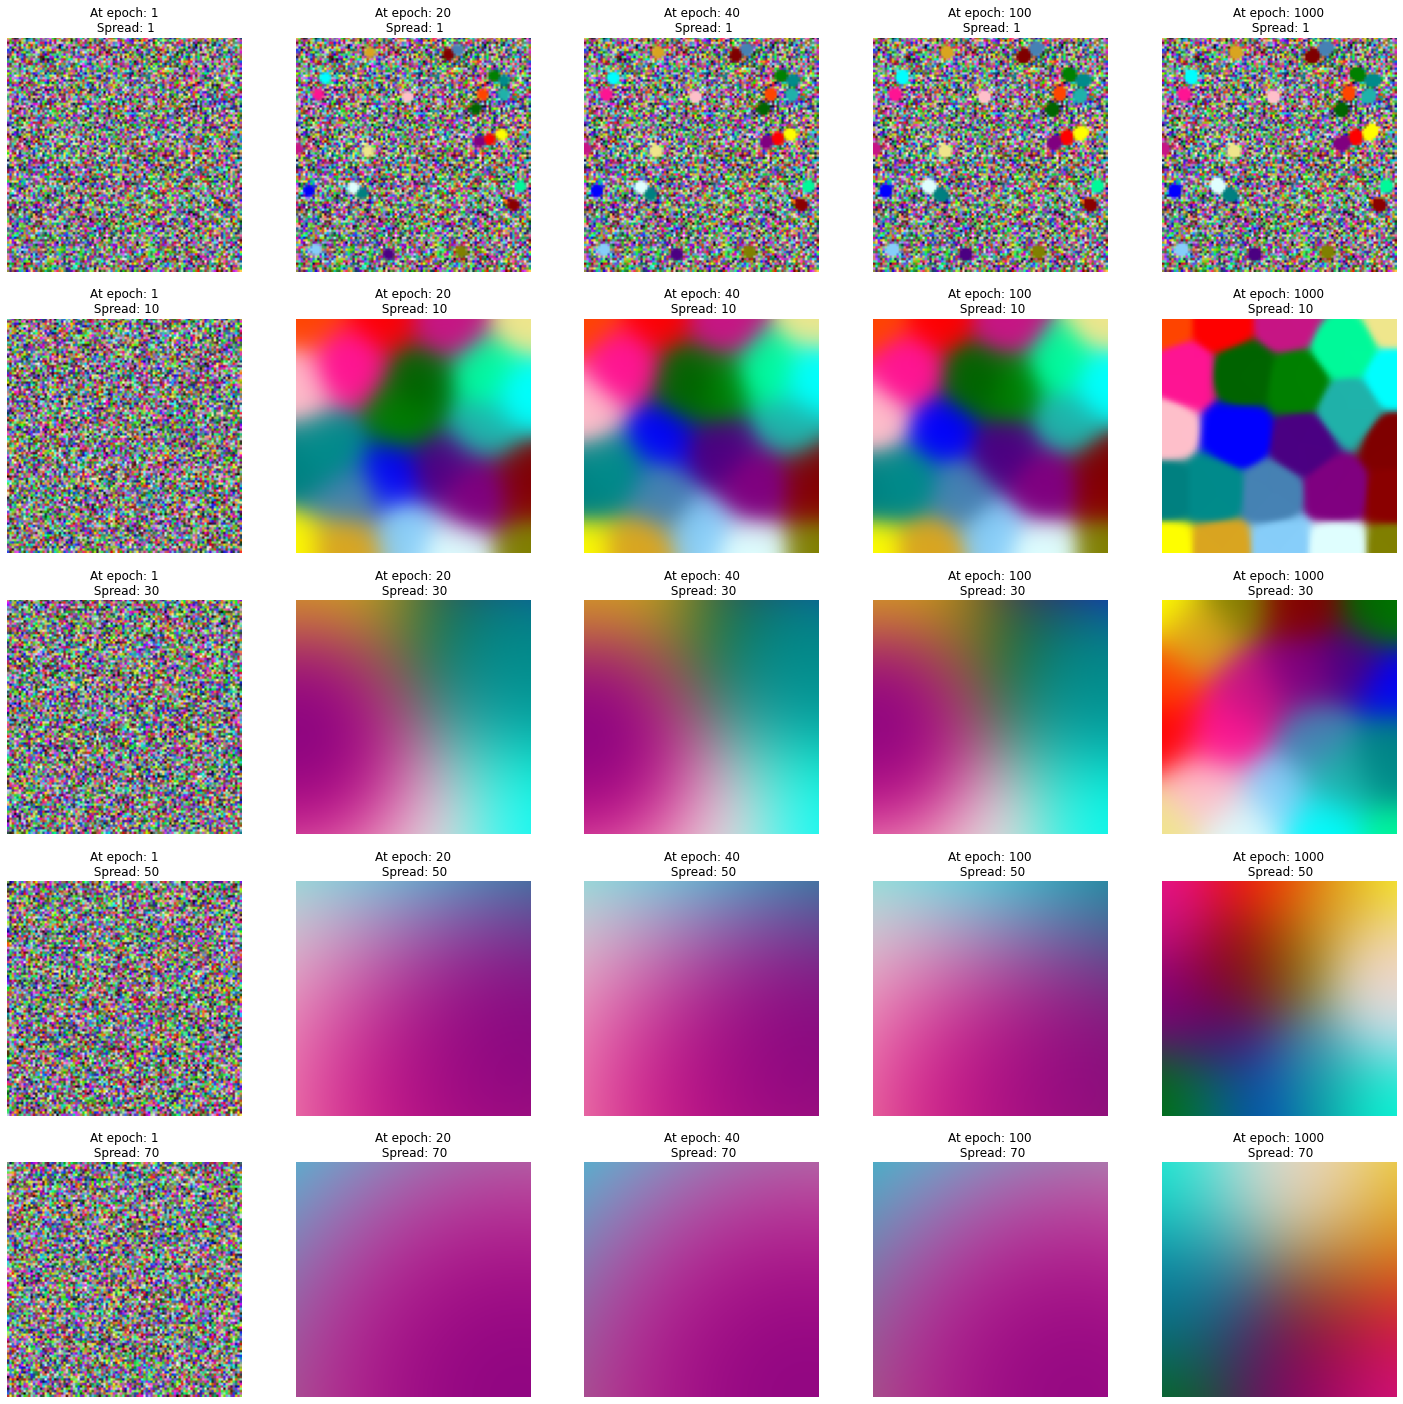

In [4]:
a = assignment(alpha_init = 0.8, test_sigmas_init = [1, 10, 30, 50, 70], max_epochs = 1000, checkpoints_epoch = [20, 40, 100, 1000])
a.generate_input_data()
a.train_and_observe()


#### Example from Class

In [5]:
# # Example from class
# weights = [[0.2, 0.4, 0.1],
#      [0.3, 0.2, 0.2],
#      [0.5, 0.3, 0.5],
#      [0.1, 0.1, 0.1]]
# ksom_2 = KSOM(size_input_features = 4, rows = 3, columns = 1, alpha_init = 0.3, alpha_update = 0.3, w = np.array(weights), neighbourhood = False, max_epochs = 2)

# input = [[1, 1, 1, 0],
#      [0, 0, 0, 1],
#      [1, 1, 0, 0],
#      [0, 0, 1, 1]]

# ksom_2.train(np.array(input), checkpoints = [1,2])